# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in data file

df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
# explore 3 variables for centrality and dispersion using built-in python functions.
# variables:  nox, age, tax
# use describe to get general statistical measures for each column as a check.
# assign to new dataframe for just medv, age, tax.
explore_df = df.describe()[['age', 'tax', 'medv']]
# explore_df.head() # sanity check

tax_mean = np.mean(df['tax'])
tax_median = np.median(df['tax'])
age_mean = np.mean(df['age'])
age_median = np.median(df['age'])
medv_mean = np.mean(df['medv'])
medv_median = np.median(df['medv'])
print("Centrality and Disperion for tax, age, and median home value:")
print('tax (mean, median)', (tax_mean, tax_median))
print('age (mean, median)', (age_mean, age_median))
print('median home value (mean, median)', (medv_mean, medv_median))

Centrality and Disperion for tax, age, and median home value:
tax (mean, median) (409.27927927927925, 330.0)
age (mean, median) (68.22642642642643, 76.7)
median home value (mean, median) (22.76876876876877, 21.6)


Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 

Examples of potential splits:
* Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
* Create 2 new dataframes based on a certain split for crime rate.

In [4]:
# use describe() to confirm summary statistics.
df.describe()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
# Let's check for null values using isna()
print(df.isna().sum(), "\n")

# Yeah! no null values. Could have done it with df.info() as well
df.info()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
# use .loc and .iloc to create 2 meaningful data sets.
# Let's create a data sets based on proximity to charles river and a split on crime.

# select rows where chas is equal to 1.
chas_df = df.loc[df['chas'].eq(1)] 

# select rows where chas is not equal to 1.
not_chas_df = df.loc[df['chas'].ne(1)]

not_chas_df.head()

#could also do this with a boolean condition is_chas = df['chas'] == 1

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [8]:
# let's look at the crime column
df['crim'].describe()

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In [9]:
# let's create a split on crime data where we take the bottom 25% vs the rest.
# use 50% value from describe()
is_crim_bottom_50 = df['crim'] <= 0.261690
is_crim_top_50 = df['crim'] > 0.261690

# new dataframes from top and bottom 50%-ile of crime
crim_bottom_df = df.iloc[df[is_crim_bottom_50].index]
crim_top_df = df.iloc[df[is_crim_top_50].index]
crim_top_df.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
10,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
11,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
14,22,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
15,23,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
16,24,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5
17,28,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8


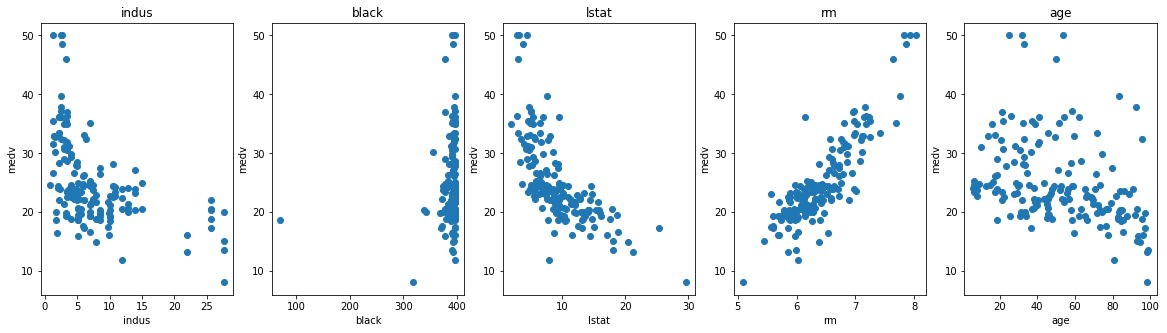

In [14]:
# Let's do a scatter plot of stuff vs median home value
plt.figure(figsize=(20, 5))

x_data = ['indus', 'black', 'lstat', 'rm', 'age']
y_data = crim_bottom_df['medv']

for idx, col in enumerate(x_data):
    plt.subplot(1, len(x_data) , idx+1)
    x = crim_bottom_df[col]
    y = y_data
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')
    

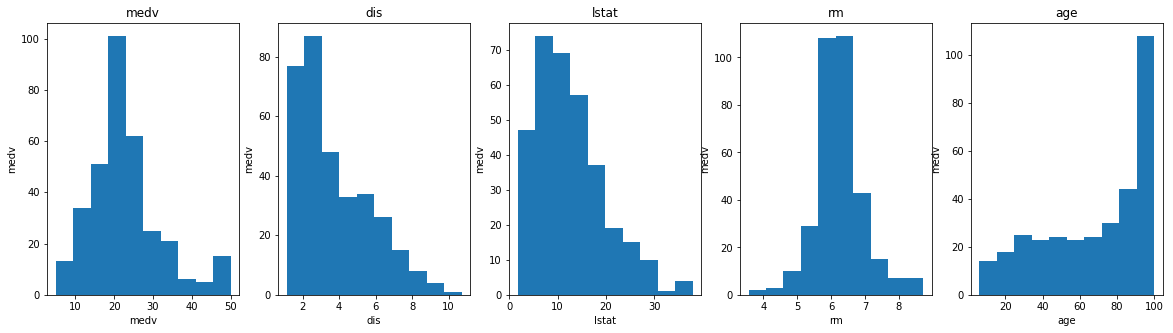

In [102]:
x_data = ['medv', 'dis', 'lstat', 'rm', 'age']
y_data = df['medv']

plt.figure(figsize=(20, 5))

for idx, col in enumerate(x_data):
    plt.subplot(1, len(x_data) , idx+1)
    x = df[col]
    y = y_data
    plt.hist(x)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

# Discussion
There appears to be little correlation between most of the data and median home value. With the 
exception of rm (rooms in dwelling) and lstat (lower status of population.

dis, lstat and age all appear to be skew, while rm is closer to a normal distribution.
* Most homes are closer to employment center
* Most homes are in lower economic status area.
* Most homes are owned by older people.

Median Home value
* Median home vale is positively correlated with number of rooms in dwelling.
* Median home value is negatively correlated with lower status of population.
* Median home value may be weakly positively correlated with proportion of Black residents in the town.   

The correlation matrix below confirms our observations with rm have the highest correlation coefficient. With zone (zn) and number of Black residents (black) being the next highest, albeit a weak correlation.

In [16]:
# Let's check our observations with a pandas statistical operation.
df.corr().round(2)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.00,0.46,-0.16,0.42,0.01,0.44,-0.11,0.26,-0.36,0.71,0.69,0.31,-0.27,0.28,-0.22
crim,0.46,1.00,-0.21,0.42,-0.04,0.46,-0.31,0.38,-0.40,0.67,0.62,0.31,-0.48,0.53,-0.41
zn,-0.16,-0.21,1.00,-0.52,-0.02,-0.50,0.33,-0.54,0.64,-0.30,-0.31,-0.38,0.17,-0.39,0.34
indus,0.42,0.42,-0.52,1.00,0.04,0.75,-0.44,0.64,-0.70,0.57,0.71,0.39,-0.34,0.61,-0.47
chas,0.01,-0.04,-0.02,0.04,1.00,0.08,0.11,0.07,-0.08,0.01,-0.02,-0.13,0.06,-0.05,0.20
nox,0.44,0.46,-0.50,0.75,0.08,1.00,-0.34,0.74,-0.77,0.61,0.67,0.19,-0.37,0.60,-0.41
rm,-0.11,-0.31,0.33,-0.44,0.11,-0.34,1.00,-0.25,0.27,-0.27,-0.36,-0.37,0.16,-0.62,0.69
age,0.26,0.38,-0.54,0.64,0.07,0.74,-0.25,1.00,-0.76,0.45,0.51,0.26,-0.27,0.59,-0.36
dis,-0.36,-0.40,0.64,-0.70,-0.08,-0.77,0.27,-0.76,1.00,-0.48,-0.53,-0.23,0.28,-0.51,0.25
rad,0.71,0.67,-0.30,0.57,0.01,0.61,-0.27,0.45,-0.48,1.00,0.90,0.47,-0.41,0.48,-0.35


In [ ]:
Th